**This dataset includes all major universities globally**

Each university is ranked based on a variety of different factors that include alumni employment, quality of education, quality of staff, publications, influence, citations, broad impact and an overall score by each year. This dataset spans from 2019-2022. 


The dataset can be found [here](https://cwur.org/2012.php). Click on the "World University Rankings" to see the rankings for each individual year starting in 2012. Each year has a differing number of rankings and a differing number of columns. 
 
Potential questions to ask include:

1. How do the rankings of each university compare to each other ( specifically how do the top universities change there overall rank and categorical rank over time).
2. Are the rankings used in this dataset considered objective or subjective ( peoples opinion vs statistical data that is less about opinion).
3. How does my Alma Mater (McMaster University) compare to other major universities in Canada and across the globe. 
4. How do American universities on average fair in terms of their overall score relative to other developed nations (United Kingdom, Canada, Germany). How has this average changed over time. 




Importing the appropriate modules 

In [166]:

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import os 


In [167]:
os.getcwd()

'C:\\Users\\grant\\Desktop\\Coding\\Projects\\data\\course_project'

Changing the current working directory

In [168]:
os.chdir('C:/Users/grant/Desktop/Coding/Projects/data/course_project')

In [169]:
os.getcwd()

'C:\\Users\\grant\\Desktop\\Coding\\Projects\\data\\course_project'

Reading the files and saving them under appropriate variable names

In [170]:
university_2019 = pd.read_csv('school_2019.csv', encoding='cp1252')
university_2020 = pd.read_csv('school_2020.csv', encoding='cp1252')
university_2021 = pd.read_csv('school_2021.csv', encoding='cp1252')
university_2022 = pd.read_csv('school_2022.csv', encoding='cp1252')





Merging the data sets fromn 2019-2022 years. 

In [171]:
merged_df = pd.concat([university_2019, university_2020, university_2021, university_2022], axis=0)
merged_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,year,score
0,1,Harvard University,USA,1,2.0,1.0,1.0,1.0,2019,100.0
1,2,Massachusetts Institute of Technology,USA,2,1.0,10.0,2.0,5.0,2019,96.7
2,3,Stanford University,USA,3,9.0,3.0,3.0,2.0,2019,95.2
3,4,University of Cambridge,United Kingdom,1,4.0,19.0,5.0,11.0,2019,94.1
4,5,University of Oxford,United Kingdom,2,10.0,24.0,10.0,4.0,2019,93.3
...,...,...,...,...,...,...,...,...,...,...
1995,1996,Bharathidasan University,India,66,NaN,NaN,NaN,1921.0,2022,65.8
1996,1997,Federal University of Maranhão,Brazil,56,NaN,NaN,NaN,1923.0,2022,65.7
1997,1998,Jiangxi University of Finance and Economics,China,302,NaN,797.0,NaN,1948.0,2022,65.7
1998,1999,University of Tarapacá,Chile,16,NaN,NaN,NaN,1925.0,2022,65.7


In [172]:
# This establishes that 3 of the columns lack a large amount of data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            8000 non-null   int64  
 1   institution           8000 non-null   object 
 2   country               8000 non-null   object 
 3   national_rank         8000 non-null   int64  
 4   quality_of_education  1709 non-null   float64
 5   alumni_employment     3878 non-null   float64
 6   quality_of_faculty    1052 non-null   float64
 7   research_performance  7748 non-null   float64
 8   year                  8000 non-null   int64  
 9   score                 8000 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 687.5+ KB


I will now drop the quality_of_education, alumni_employment, and  quality_of_faculty columns due to a lack of data. 

In [173]:
merged_df.drop(columns=['quality_of_education', 'alumni_employment', 'quality_of_faculty'], inplace= True)

In [174]:
merged_df

,world_rank,institution,country,national_rank,research_performance,year,score
0,1,Harvard University,USA,1,1.0,2019,100.0
1,2,Massachusetts Institute of Technology,USA,2,5.0,2019,96.7
2,3,Stanford University,USA,3,2.0,2019,95.2
3,4,University of Cambridge,United Kingdom,1,11.0,2019,94.1
4,5,University of Oxford,United Kingdom,2,4.0,2019,93.3
...,...,...,...,...,...,...,...
1995,1996,Bharathidasan University,India,66,1921.0,2022,65.8
1996,1997,Federal University of Maranhão,Brazil,56,1923.0,2022,65.7
1997,1998,Jiangxi University of Finance and Economics,China,302,1948.0,2022,65.7
1998,1999,University of Tarapacá,Chile,16,1925.0,2022,65.7


In [175]:
merged_df.describe()

,world_rank,national_rank,research_performance,year,score
count,8000.000000,8000.000000,7748.000000,8000.000000,8000.000000
mean,1000.500000,67.638750,969.178240,2020.500000,71.611225
std,577.386285,83.566911,559.513764,1.118104,5.073271
min,1.000000,1.000000,1.000000,2019.000000,65.700000
25%,500.750000,10.000000,485.000000,2019.750000,67.700000
50%,1000.500000,33.000000,969.000000,2020.500000,70.300000
75%,1500.250000,87.000000,1453.000000,2021.250000,74.100000
max,2000.000000,358.000000,2000.000000,2022.000000,100.000000


In [176]:
merged_df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'research_performance', 'year', 'score'],
      dtype='object')

Assessing the number of rows and columns in the data set. ( 8000 rows x 7 columns)

In [177]:
merged_df.shape

(8000, 7)

Creating a copy of the data set.

In [178]:
merged_df_copy = merged_df.copy()

Looking for the total number of unique entries in the institution column


In [179]:
merged_df['country'].nunique()

104

Looking at all unique entries in each column to assess for misspelled names.

In [180]:
# list_cells = [merged_df[i].unique().tolist() for i in merged_df.columns]
# list_cells

**Analyzing Data**

Sorting the universities by world rank from highest to lowest.

In [181]:
merged_df.sort_values('world_rank', ascending= True).head(20)

,world_rank,institution,country,national_rank,research_performance,year,score
0,1,Harvard University,USA,1,1.0,2019,100.0
0,1,Harvard University,USA,1,1.0,2022,100.0
0,1,Harvard University,USA,1,1.0,2021,100.0
0,1,Harvard University,USA,1,1.0,2020,100.0
1,2,Massachusetts Institute of Technology,USA,2,7.0,2022,96.7
1,2,Massachusetts Institute of Technology,USA,2,7.0,2020,96.7
1,2,Massachusetts Institute of Technology,USA,2,8.0,2021,96.7
1,2,Massachusetts Institute of Technology,USA,2,5.0,2019,96.7
2,3,Stanford University,USA,3,2.0,2019,95.2
2,3,Stanford University,USA,3,2.0,2021,95.1


Creating a dataframe with the top 10 universities from 2019 to 2022

In [182]:
top_10 = merged_df[merged_df.world_rank <= 10]
top_10

,world_rank,institution,country,national_rank,research_performance,year,score
0,1,Harvard University,USA,1,1.0,2019,100.0
1,2,Massachusetts Institute of Technology,USA,2,5.0,2019,96.7
2,3,Stanford University,USA,3,2.0,2019,95.2
3,4,University of Cambridge,United Kingdom,1,11.0,2019,94.1
4,5,University of Oxford,United Kingdom,2,4.0,2019,93.3
5,6,Columbia University,USA,4,12.0,2019,92.6
6,7,Princeton University,USA,5,54.0,2019,92.0
7,8,"University of California, Berkeley",USA,6,6.0,2019,91.6
8,9,University of Pennsylvania,USA,7,14.0,2019,91.1
9,10,University of Chicago,USA,8,16.0,2019,90.7


In [183]:
# This establishes that there are only 2 countries with top level universities globally by world rank (UK and USA)
top_10['country'].nunique()

2

In [184]:
score_top = merged_df[ merged_df.score > 90]
score_top

,world_rank,institution,country,national_rank,research_performance,year,score
0,1,Harvard University,USA,1,1.0,2019,100.0
1,2,Massachusetts Institute of Technology,USA,2,5.0,2019,96.7
2,3,Stanford University,USA,3,2.0,2019,95.2
3,4,University of Cambridge,United Kingdom,1,11.0,2019,94.1
4,5,University of Oxford,United Kingdom,2,4.0,2019,93.3
5,6,Columbia University,USA,4,12.0,2019,92.6
6,7,Princeton University,USA,5,54.0,2019,92.0
7,8,"University of California, Berkeley",USA,6,6.0,2019,91.6
8,9,University of Pennsylvania,USA,7,14.0,2019,91.1
9,10,University of Chicago,USA,8,16.0,2019,90.7


In [185]:
merged_df_2019 = merged_df[merged_df.year == 2019]
merged_df_2019

,world_rank,institution,country,national_rank,research_performance,year,score
0,1,Harvard University,USA,1,1.0,2019,100.0
1,2,Massachusetts Institute of Technology,USA,2,5.0,2019,96.7
2,3,Stanford University,USA,3,2.0,2019,95.2
3,4,University of Cambridge,United Kingdom,1,11.0,2019,94.1
4,5,University of Oxford,United Kingdom,2,4.0,2019,93.3
...,...,...,...,...,...,...,...
1995,1996,University of Klagenfurt,Austria,17,1931.0,2019,65.8
1996,1997,National University of Río Cuarto,Argentina,11,1932.0,2019,65.8
1997,1998,Osmania University,India,68,1942.0,2019,65.8
1998,1999,Mu?la S?tk? Koçman University,Turkey,61,1933.0,2019,65.8


Seeing where McMaster University ranks by each year ( My Alma Mater)

In [186]:
mcmaster_overall = merged_df[merged_df.institution == 'McMaster University']
mcmaster_overall

,world_rank,institution,country,national_rank,research_performance,year,score
126,127,McMaster University,Canada,6,108.0,2019,80.7
159,160,McMaster University,Canada,6,127.0,2020,79.7
163,164,McMaster University,Canada,6,133.0,2021,79.6
171,172,McMaster University,Canada,6,138.0,2022,79.4


In [187]:
mcmaster_metrics = mcmaster_overall[['world_rank', 'national_rank', 'score']]
mcmaster_metrics

,world_rank,national_rank,score
126,127,6,80.7
159,160,6,79.7
163,164,6,79.6
171,172,6,79.4


In [188]:
mcmaster_mean = mcmaster_metrics.mean()
mcmaster_mean

world_rank       155.75
national_rank      6.00
score             79.85
dtype: float64

Compare average score of Mcmaster Univerty from 2019-2022 and compare to other top universities in Canada over the same period of time. 

In [189]:
universites_canada = merged_df[merged_df.country == "Canada"]
universites_canada

,world_rank,institution,country,national_rank,research_performance,year,score
23,24,University of Toronto,Canada,1,3.0,2019,87.5
29,30,McGill University,Canada,2,41.0,2019,86.7
51,52,University of British Columbia,Canada,3,29.0,2019,84.5
88,89,University of Alberta,Canada,4,75.0,2019,82.3
104,105,University of Montreal,Canada,5,92.0,2019,81.6
...,...,...,...,...,...,...,...
1703,1704,University of Québec at Trois-Rivières,Canada,38,1631.0,2022,66.8
1799,1800,Saint Mary's University,Canada,39,1736.0,2022,66.5
1870,1871,University of Winnipeg,Canada,40,1797.0,2022,66.2
1964,1965,University of Québec at Chicoutimi,Canada,41,1886.0,2022,65.9


Looking at the top 10 universities in Canada from 2019-2022


In [190]:
canada_top_10 = universites_canada[universites_canada.national_rank <= 10]
canada_top_10

,world_rank,institution,country,national_rank,research_performance,year,score
23,24,University of Toronto,Canada,1,3.0,2019,87.5
29,30,McGill University,Canada,2,41.0,2019,86.7
51,52,University of British Columbia,Canada,3,29.0,2019,84.5
88,89,University of Alberta,Canada,4,75.0,2019,82.3
104,105,University of Montreal,Canada,5,92.0,2019,81.6
126,127,McMaster University,Canada,6,108.0,2019,80.7
178,179,University of Waterloo,Canada,7,200.0,2019,79.2
183,184,University of Calgary,Canada,8,144.0,2019,79.1
185,186,University of Ottawa,Canada,9,131.0,2019,79.0
186,187,Western University,Canada,10,184.0,2019,79.0


Looking at the lowest ranked universities in Canada


In [191]:
universites_canada.sort_values('national_rank', ascending= False).head(10)

,world_rank,institution,country,national_rank,research_performance,year,score
1957,1958,Royal Military College of Canada,Canada,44,1883.0,2020,66.0
1940,1941,Acadia University,Canada,43,NaN,2020,66.0
1909,1910,Acadia University,Canada,43,1968.0,2019,66.1
1842,1843,University of Québec at Chicoutimi,Canada,42,1782.0,2019,66.4
1945,1946,University of Québec at Chicoutimi,Canada,42,1871.0,2021,65.9
1926,1927,University of Québec at Chicoutimi,Canada,42,1848.0,2020,66.1
1971,1972,University of Northern British Columbia,Canada,42,1897.0,2022,65.8
1844,1845,University of Northern British Columbia,Canada,41,1762.0,2020,66.4
1964,1965,University of Québec at Chicoutimi,Canada,41,1886.0,2022,65.9
1878,1879,University of Northern British Columbia,Canada,41,1802.0,2021,66.2


Creating a new data frame with date as the index 

In [192]:
merged_date = merged_df[['world_rank',
                        'institution',
                        'country',
                        'national_rank',
                        'year',
                        'score']]

In [193]:
merged_date.set_index('year', inplace=True)


In [194]:
merged_date

,world_rank,institution,country,national_rank,score
year,,,,,
2019,1,Harvard University,USA,1,100.0
2019,2,Massachusetts Institute of Technology,USA,2,96.7
2019,3,Stanford University,USA,3,95.2
2019,4,University of Cambridge,United Kingdom,1,94.1
2019,5,University of Oxford,United Kingdom,2,93.3
...,...,...,...,...,...
2022,1996,Bharathidasan University,India,66,65.8
2022,1997,Federal University of Maranhão,Brazil,56,65.7
2022,1998,Jiangxi University of Finance and Economics,China,302,65.7


Making Canadian University specific datasets 

In [195]:
canada_top_10.head(10)

,world_rank,institution,country,national_rank,research_performance,year,score
23,24,University of Toronto,Canada,1,3.0,2019,87.5
29,30,McGill University,Canada,2,41.0,2019,86.7
51,52,University of British Columbia,Canada,3,29.0,2019,84.5
88,89,University of Alberta,Canada,4,75.0,2019,82.3
104,105,University of Montreal,Canada,5,92.0,2019,81.6
126,127,McMaster University,Canada,6,108.0,2019,80.7
178,179,University of Waterloo,Canada,7,200.0,2019,79.2
183,184,University of Calgary,Canada,8,144.0,2019,79.1
185,186,University of Ottawa,Canada,9,131.0,2019,79.0
186,187,Western University,Canada,10,184.0,2019,79.0


In [196]:
mcmaster_year = merged_date[merged_date.institution == "McMaster University"]
montreal_year = merged_date[merged_date.institution == "University of Montreal"]
waterloo_year = merged_date[merged_date.institution == "University of Waterloo"]
toronto_year = merged_date[merged_date.institution == "University of Toronto"]
mcgill_year = merged_date[merged_date.institution == "Mcgill University"]
british_columbia_year = merged_date[merged_date.institution == "University of British Columbia"]
alberta_year = merged_date[merged_date.institution == "University of Alberta"]
calgary_year = merged_date[merged_date.institution == "University of Calgary"]
ottawa_year = merged_date[merged_date.institution == "University of Ottawa"]
western_year = merged_date[merged_date.institution == "Western University"]


                            

In [197]:
mcmaster_year

,world_rank,institution,country,national_rank,score
year,,,,,
2019,127,McMaster University,Canada,6,80.7
2020,160,McMaster University,Canada,6,79.7
2021,164,McMaster University,Canada,6,79.6
2022,172,McMaster University,Canada,6,79.4


Text(0.5, 1.0, 'McMaster University World Ranking (2019-2022)')

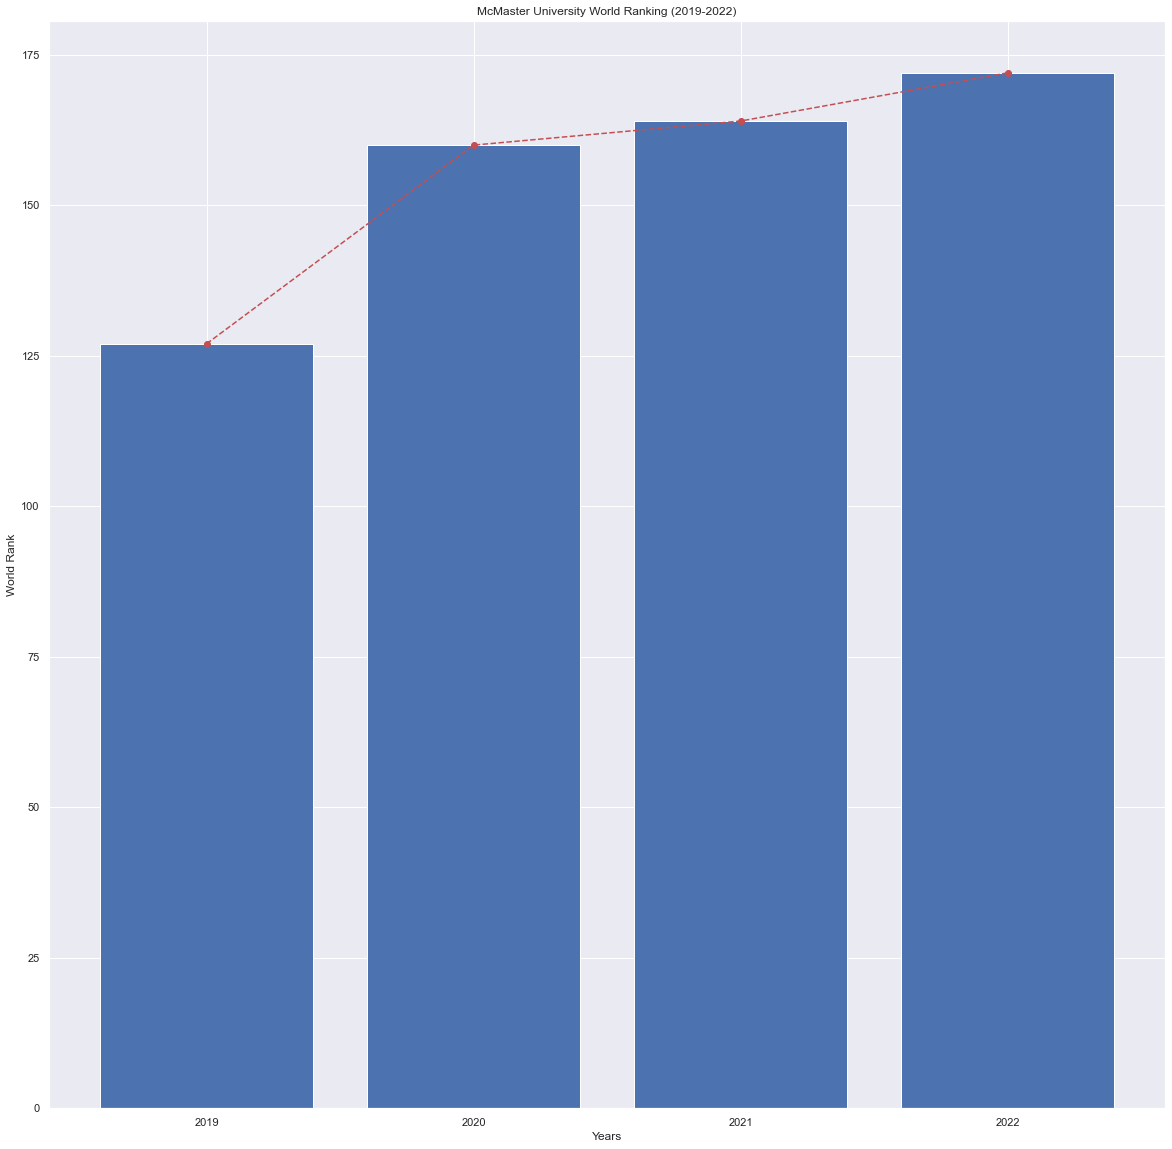

In [198]:
plt.bar(mcmaster_year.index,mcmaster_year.world_rank)
plt.plot(mcmaster_year.world_rank, 'o--r')

plt.xlabel('Years')
plt.xticks(np.arange(2019,2023, step=1))
plt.ylabel('World Rank')


plt.title('McMaster University World Ranking (2019-2022)')

In [199]:
sns.set_style('darkgrid')

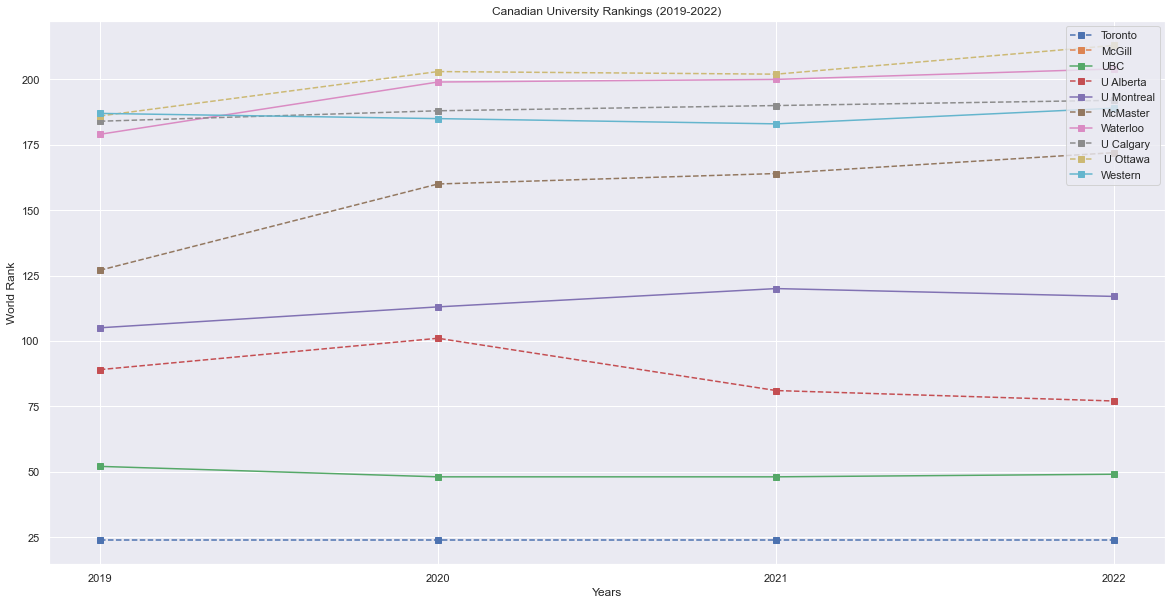

In [200]:
# Graphing Canadian Universities based on world rank
plt.figure(figsize=(20,10))

plt.plot(toronto_year.world_rank,marker = 's', ls='--')
plt.plot(mcgill_year.world_rank,marker = 's', ls='--')
plt.plot(british_columbia_year.world_rank,marker = 's', ls='-')
plt.plot(alberta_year.world_rank,marker = 's', ls='--')
plt.plot(montreal_year.world_rank,marker = 's', ls='-')
plt.plot(mcmaster_year.world_rank,marker = 's', ls='--')
plt.plot(waterloo_year.world_rank,marker = 's', ls='-')
plt.plot(calgary_year.world_rank,marker = 's', ls='--')
plt.plot(ottawa_year.world_rank,marker = 's', ls='--')
plt.plot(western_year.world_rank,marker = 's', ls='-')


plt.xlabel('Years')
plt.xticks(np.arange(2019,2023, step=1))
plt.ylabel('World Rank')

plt.title('Canadian University Rankings (2019-2022)')
plt.legend(['Toronto', 'McGill', 'UBC', 'U Alberta', 'U Montreal', 'McMaster', "Waterloo", 'U Calgary', ' U Ottawa', 'Western' ], loc='upper right');

**Top Universities Globally**

In [201]:
world_top_10 = merged_date[merged_date.world_rank <= 10].reset_index()
world_top_10

,year,world_rank,institution,country,national_rank,score
0,2019,1,Harvard University,USA,1,100.0
1,2019,2,Massachusetts Institute of Technology,USA,2,96.7
2,2019,3,Stanford University,USA,3,95.2
3,2019,4,University of Cambridge,United Kingdom,1,94.1
4,2019,5,University of Oxford,United Kingdom,2,93.3
5,2019,6,Columbia University,USA,4,92.6
6,2019,7,Princeton University,USA,5,92.0
7,2019,8,"University of California, Berkeley",USA,6,91.6
8,2019,9,University of Pennsylvania,USA,7,91.1
9,2019,10,University of Chicago,USA,8,90.7


In [202]:
sns.set(rc={'figure.figsize':(20,20)})

c:\Users\grant\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


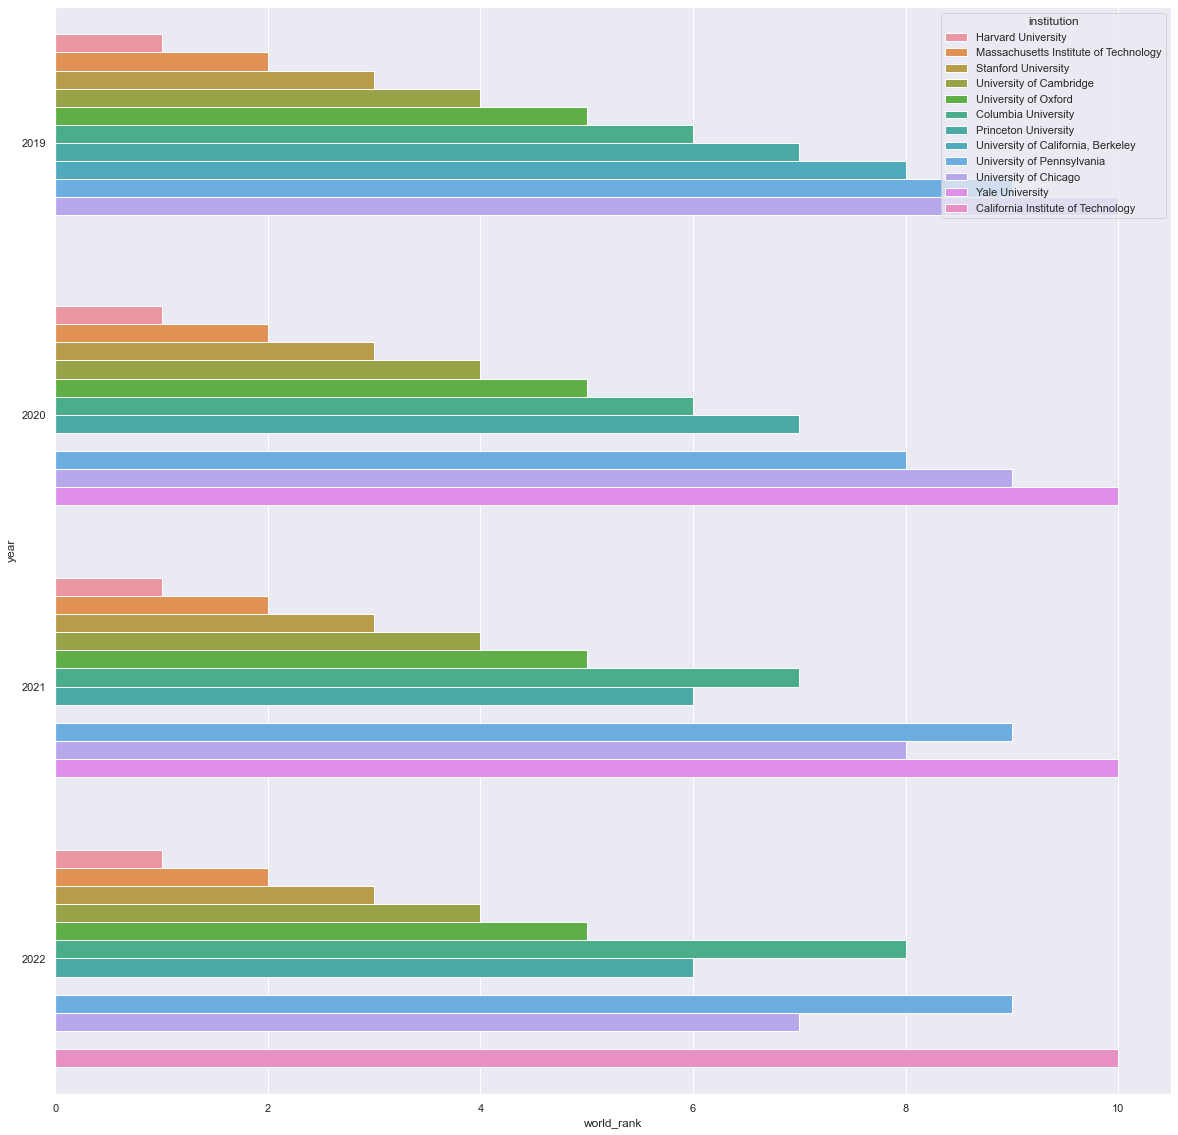

In [203]:
# Graphing the top universities globally by world_rank


sns.barplot('world_rank','year',hue='institution', data=world_top_10, orient='h');



Looking at the average score of universities based on the country and graphing the score to compare each country. 

In [204]:
score_avg_df = merged_df.groupby('country')[['score']].mean()

In [205]:
score_avg_df

,score
country,
Algeria,66.388889
Argentina,69.130000
Armenia,70.350000
Australia,73.795513
Austria,71.826866
...,...
Uruguay,70.825000
Venezuela,66.900000
Vietnam,67.457895


c:\Users\grant\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


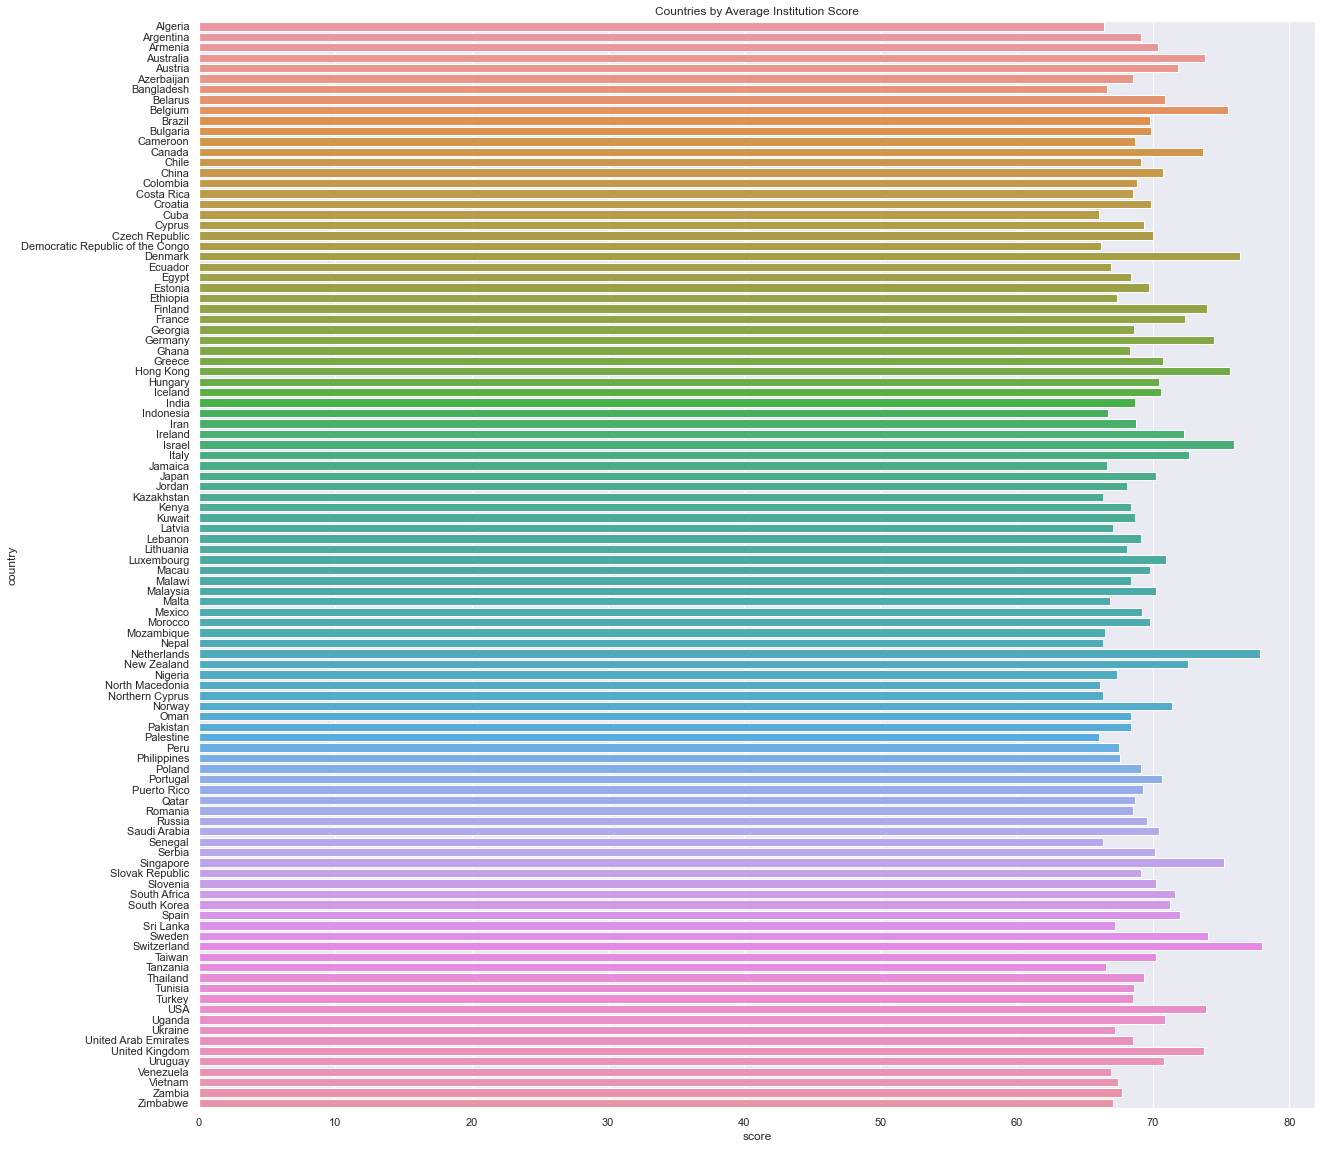

In [206]:
plt.title('Countries by Average Institution Score')
sns.barplot(score_avg_df.score, score_avg_df.index, orient = 'h');

Selecting for specific developed nations to compare to Canada in terms of score and rank on average 

In [207]:
top_countries = merged_df.loc[merged_df['country'].isin(['USA', 'United Kingdom', 'Canada', 'China'])]

In [208]:
top_countries

,world_rank,institution,country,national_rank,research_performance,year,score
0,1,Harvard University,USA,1,1.0,2019,100.0
1,2,Massachusetts Institute of Technology,USA,2,5.0,2019,96.7
2,3,Stanford University,USA,3,2.0,2019,95.2
3,4,University of Cambridge,United Kingdom,1,11.0,2019,94.1
4,5,University of Oxford,United Kingdom,2,4.0,2019,93.3
...,...,...,...,...,...,...,...
1980,1981,Huaibei Normal University,China,299,1907.0,2022,65.8
1983,1984,Hebei University of Science and Technology,China,300,1924.0,2022,65.8
1986,1987,Chengdu University of Traditional Chinese Medi...,China,301,1912.0,2022,65.8
1991,1992,University of North Florida,USA,335,1917.0,2022,65.8


Filtering based on total number of times each country appear the list from 2019-2022

In [209]:
count_top_df = top_countries.groupby('country')[['score']].count()

In [210]:
# This establishes that the USA and China have a large number of highly ranked insititutions globally. 
count_top_df

,score
country,
Canada,171
China,1095
USA,1397
United Kingdom,378


c:\Users\grant\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


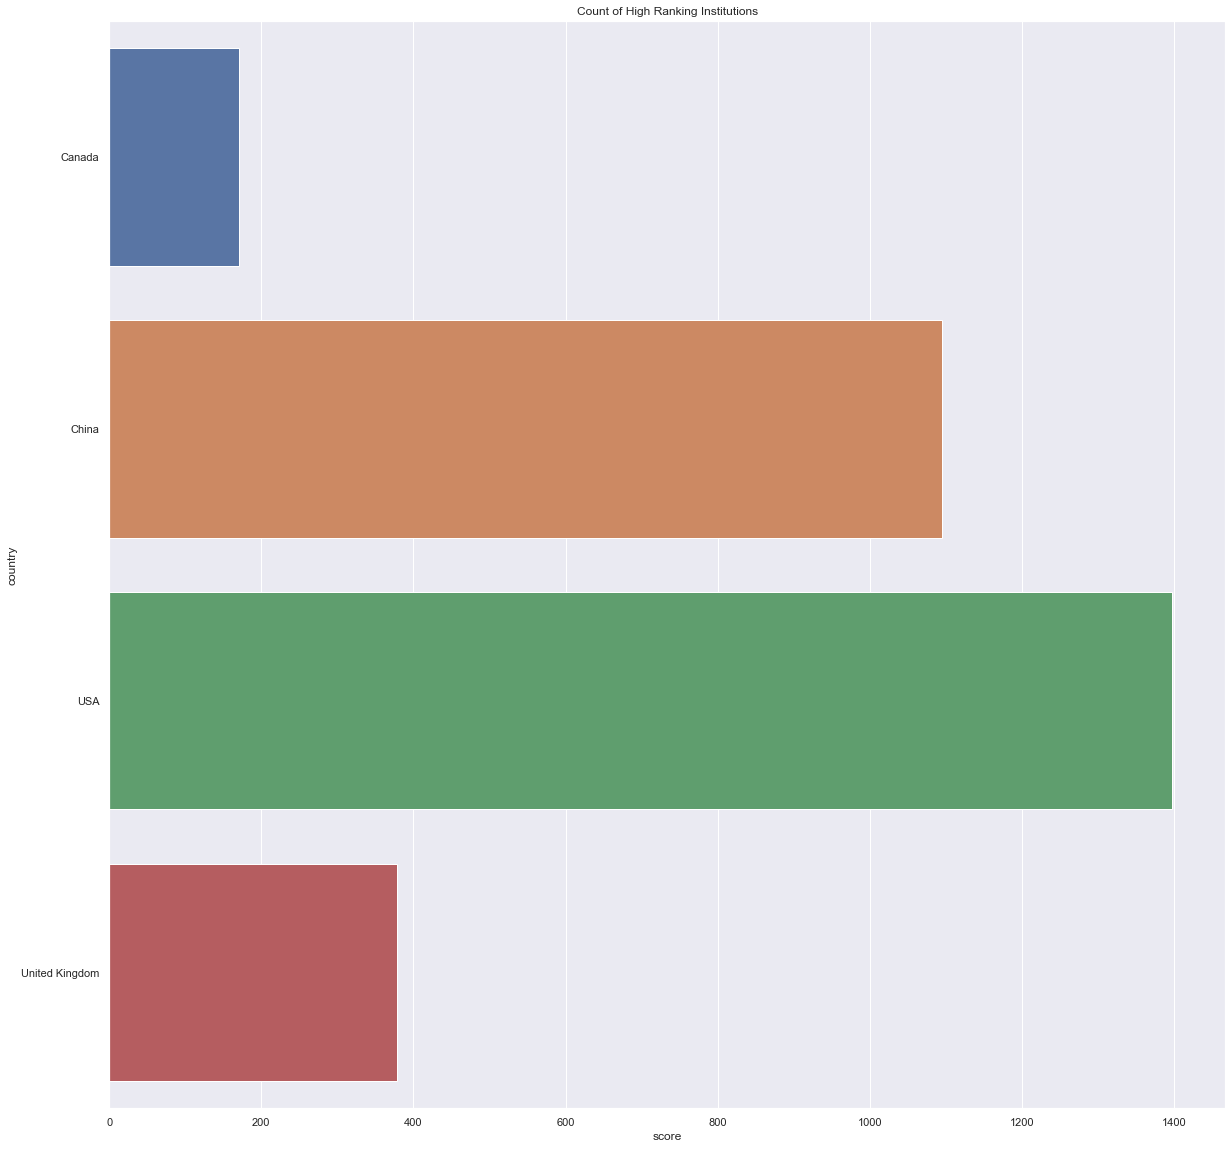

In [211]:
plt.title('Count of High Ranking Institutions')
sns.barplot(count_top_df.score, count_top_df.index, orient = 'h');